In [55]:
import selectivesearch
import skimage.data
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm_notebook as tqdm

In [110]:
root_path = './results/densenet161_object_classification_WSOD/test_bbox_th0.5/'
img_root = '/home/stevetod/jzy/dataset/PascalVOC/JPEGImages/'
img_list = os.listdir(root_path)

In [111]:
for i in tqdm(range(len(img_list)), total=len(img_list)):
    img = Image.open(os.path.join(img_root, img_list[i].replace('.txt', '.jpg')))
    bbox_res_path = os.path.join(root_path, img_list[i])
    with open(bbox_res_path) as f:
        bbox_res = f.read().splitlines()
    out_str = ''
    for item in bbox_res:
        split = item.split()
        label = split[0]
        bbox = [int(x) for x in split[2:]]
        cropped = img.crop(bbox)
        cropped_array = np.array(cropped)
        img_lbl, regions = selectivesearch.selective_search(cropped_array, scale=500, sigma=0.8, min_size=50)
        str_list = []
        for reg in regions:
            rect = list(reg['rect'])
            # add offset
            rect[0] += bbox[0]
            rect[1] += bbox[1]
            rect[2] += rect[0]
            rect[3] += rect[1]
            str_list.append('%s %s\n' % (label, ' '.join([str(x) for x in rect])))
        out_str += ''.join(set(str_list))
    with open(os.path.join('./results/ss', img_list[i]), 'w') as f:
        f.write(out_str)

/home/data/private/disk5/stevetod/anaconda3/envs/pytorch_py3/lib/python3.6/site-packages/skimage/color/colorconv.py:265: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [115]:
ss_root = './results/ss'

In [116]:
with open(os.path.join(ss_root, img_list[0])) as f:
    ss_res = f.read().splitlines()

In [117]:
bbox = [int(x) for x in ss_res[0].split()[1:]]
bbox

[62, 0, 127, 79]

In [118]:
img = Image.open(os.path.join(img_root, img_list[0].replace('.txt', '.jpg')))

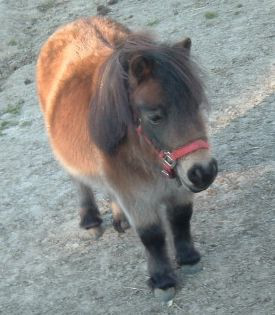

In [119]:
img

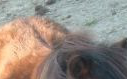

In [120]:
img.crop((bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]))

In [ ]:
from torch.utils

In [60]:
i = 0

In [50]:
class SSDataset

5 249 160 29 31
5 228 240 3 17
5 235 299 9 9
5 294 181 7 8
5 250 184 23 51
5 207 278 28 14
5 229 285 18 21
5 185 15 10 4
5 229 285 18 23
5 207 278 40 30
5 102 24 20 19
5 157 143 32 68
5 132 216 19 14
5 221 127 64 108
5 170 0 15 4
5 142 0 43 61
5 93 19 5 6
5 62 99 25 16
5 93 22 43 118
5 157 296 8 3
5 245 157 40 35
5 326 296 6 7
5 198 125 4 8
5 62 0 274 314
5 188 265 4 4
5 223 219 5 21
5 64 203 8 3
5 298 4 6 3
5 62 22 74 118
5 98 0 34 12
5 113 144 26 32
5 93 22 43 111
5 248 157 37 31
5 252 72 12 14
5 221 127 50 60
5 181 31 5 4
5 136 14 4 6
5 295 95 35 25
5 132 184 61 56
5 235 10 5 5
5 140 184 53 56
5 134 243 6 4
5 62 119 34 17
5 62 61 22 30
5 310 144 10 6
5 228 215 36 53
5 221 127 52 108
5 62 119 34 10
5 266 12 14 6
5 219 37 33 9
5 284 183 5 6
5 221 127 68 108
5 245 38 9 21
5 108 69 28 71
5 85 78 10 7
5 62 126 16 10
5 281 144 7 5
5 245 183 16 9
5 332 81 4 8
5 198 231 14 46
5 219 37 35 22
5 142 0 35 61
5 221 127 68 141



In [14]:
len(regions)

374